# 1.) Import the modules we will need

In [1]:
from __future__ import division, unicode_literals
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

# 2.) Preview the raw data

In [2]:
df = pd.read_excel('./input/complete_data.xls')
df.head()

,account number,date,discount,ext price,name,quantity,sku,unit price,total price,month,address,city,state,abbrev,status
0,383080,2014-02-01 09:04:59,0,235.83,Will LLC,7,B1-20000,33.69,235.83,2,?,?,?,NaN,bronze
1,412290,2014-02-01 11:51:46,0,232.32,Jerde-Hilpert,11,S1-27722,21.12,232.32,2,302 Broadway,Celebration,Florda,FL,bronze
2,412290,2014-02-01 17:24:32,0,107.97,Jerde-Hilpert,3,B1-86481,35.99,107.97,2,302 Broadway,Celebration,Florda,FL,bronze
3,412290,2014-02-01 19:56:48,0,1814.70,Jerde-Hilpert,23,B1-20000,78.90,1814.70,2,302 Broadway,Celebration,Florda,FL,bronze
4,672390,2014-02-02 03:45:20,0,2679.36,Kuhn-Gusikowski,48,S1-06532,55.82,2679.36,2,185 South Park,Huston,Texes,TX,silver


# 3.) Now for the charts

There are several charting library in Python, and we will look at some of the most popular today. We will start with building some absolute basics, like bar and line charts, then move on to something a little more fun. All the charts charts below are feed our DataFrame object we created earlier.

## 3.1) MatPlotLib

The first is MatPlotLib, the grand-daddy of them all. Its powerful, flexable, and totally ubiquitous. Unfortunatly, with great power comes great complexity. Here is an example of how to draw a simple line chart using the matplotlib api only. Today MatPlotLib is usually used as a base libray that is further abstracted by higher level tools.

http://matplotlib.org/

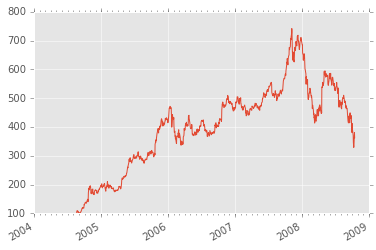

In [13]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')

# load up some sample data to plot
datafile = cbook.get_sample_data('goog.npy')
r = np.load(datafile, encoding='bytes').view(np.recarray)
fig, ax = plt.subplots()
ax.plot(r.date, r.adj_close)

# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)

datemin = datetime.date(r.date.min().year, 1, 1)
datemax = datetime.date(r.date.max().year + 1, 1, 1)
ax.set_xlim(datemin, datemax)

# format the coords message box
def price(x):
    return '$%1.2f' % x

ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.format_ydata = price
ax.grid(True)

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()

plt.show()

## 3.2) Pandas

Pandas uses matplotlib internally as its low level graphing api, but presents us with an api that abstracts away the complexity. This leaves us with a simple api to produce charts and graphs, while still having the raw power to customize should we be so bold.

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### Line Chart

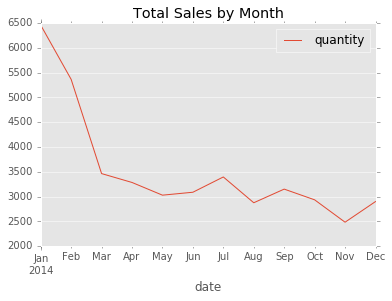

In [5]:
sales_by_month = df[['date', 'quantity']].set_index('date')
sales_by_month.resample('M', how=sum).plot(title="Total Sales by Month")

### Bar Chart

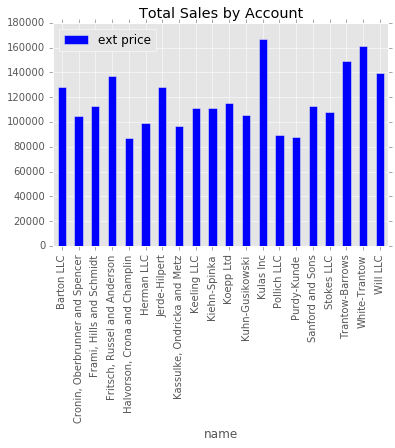

In [4]:
summary = df[['ext price', 'name']].groupby('name').sum()
summary.plot(kind='bar', title="Total Sales by Account")

### Histogram

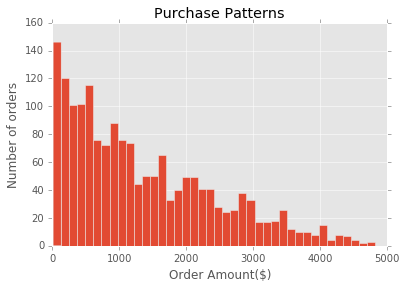

In [6]:
purchase_patterns = df[['ext price','date']]
purchase_patterns.head()
purchase_plot = purchase_patterns['ext price'].hist(bins=40)
purchase_plot.set_title("Purchase Patterns")
purchase_plot.set_xlabel("Order Amount($)")
purchase_plot.set_ylabel("Number of orders")

### Stacked Bar Chart

In [7]:
sales_by_sku=df[['name', 'sku', 'ext price']].groupby(['name', 'sku']).sum()
sales_by_sku.head()

ext price
name       sku                
Barton LLC B1-04202    2433.20
           B1-05914     324.72
           B1-20000   12871.94
           B1-33087    7423.72
           B1-33364    4517.03

In [8]:
sales_by_sku.unstack().head()

ext price                              \
sku                              B1-04202 B1-05914  B1-20000 B1-33087   
name                                                                    
Barton LLC                        2433.20   324.72  12871.94  7423.72   
Cronin, Oberbrunner and Spencer   5054.84  4188.04   3652.18  4188.22   
Frami, Hills and Schmidt          2696.74  1107.12   9820.16  8221.23   
Fritsch, Russel and Anderson       878.88  3828.28   7101.51  4488.53   
Halvorson, Crona and Champlin     1156.16  2513.48       NaN  3876.77   

                                                                      \
sku                             B1-33364 B1-38851 B1-50809  B1-53102   
name                                                                   
Barton LLC                       4517.03  8247.14  5244.24    499.33   
Cronin, Oberbrunner and Spencer   867.79  5533.87  1731.18   1897.72   
Frami, Hills and Schmidt          348.12  3119.49  5863.80   1625.49   
Fritsch, Russel and Anderson     3538.42  1594.40  4180.75  10056.40   
Halvorson, Crona and Champlin    2487.01  6499.80   232.37   6184.49   

                                                     ...              \
sku                              B1-53636 B1-65551   ...    S2-00301   
name                                                 ...               
Barton LLC                        3737.59  4703.54   ...         NaN   
Cronin, Oberbrunner and Spencer   7474.24      NaN   ...     1917.89   
Frami, Hills and Schmidt          1824.80      NaN   ...     6850.51   
Fritsch, Russel and Anderson     10317.79  4459.28   ...     5061.30   
Halvorson, Crona and Champlin     1667.40  4274.48   ...     1092.57   

                                                                               \
sku                              S2-10342 S2-11481 S2-16558 S2-23246 S2-34077   
name                                                                            
Barton LLC                       16881.79   728.50   804.89      NaN  5726.16   
Cronin, Oberbrunner and Spencer    637.30  3584.41  3652.59  5725.80  5433.63   
Frami, Hills and Schmidt          7131.21      NaN  2749.18  4211.83  2884.08   
Fritsch, Russel and Anderson       603.90  3815.74  3121.96  4280.47  6388.34   
Halvorson, Crona and Champlin      155.60  9186.50   182.26      NaN  1097.28   

                                                                      
sku                             S2-77896 S2-78676  S2-82423 S2-83881  
name                                                                  
Barton LLC                       6156.02  2616.60   3735.43  2679.90  
Cronin, Oberbrunner and Spencer  5344.63  2264.50   5527.16  2044.70  
Frami, Hills and Schmidt         1597.53  2887.47   4564.25  9006.80  
Fritsch, Russel and Anderson     5279.78  4809.97  12463.94  1995.60  
Halvorson, Crona and Champlin    1492.93  4901.82       NaN  7577.06  

[5 rows x 30 columns]

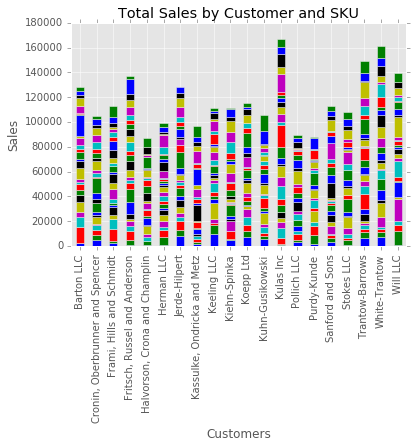

In [9]:
my_plot = sales_by_sku.unstack().plot(kind='bar',stacked=True, title="Total Sales by Customer and SKU", legend=None)
my_plot.set_xlabel("Customers")
my_plot.set_ylabel("Sales")

## 3.3) Bokeh

Bokeh is a Python interactive visualization library that targets modern web browsers for presentation. Its goal is to provide elegant, concise construction of novel graphics in the style of D3.js, and to extend this capability with high-performance interactivity over very large or streaming datasets.

http://bokeh.pydata.org/en/latest/


In [10]:
from bokeh.charts import Bar, Histogram, show, output_notebook
output_notebook()

Loading BokehJS ...

### Interactive Bar Chart

In [11]:
b = Bar(summary, label='name', values='ext price', title="Total Sales by Account")
show(b)

### Interactive Histogram

In [12]:
hist = Histogram(df, values='ext price', bins=40, legend=True)
show(hist)